

```
# This is formatted as code
```

# Assignment 4: Differentiation and optimization

In [100]:
import sympy as sym 
import jax.numpy as np
import matplotlib.pyplot as plt
import math
import random
import math

## Question 1: Differentiations

Function 

$$f(a, b) = \frac a b cos(a)^2 \exp \left( - \frac {a^2} {b^2}\right)$$

is given.

1. Derive the partial derivatives of $f(a, b)$ by $a$ and $b$. (Write them in this text)

    $$\frac {\partial f} {\partial a} = 
    \exp \left( - \frac {a^2} {b^2}\right) cos(a) ( \frac {2b^2asin(a)+(2a^2-b^2)cos(a)} {b^3})$$
    $$\frac {\partial f} {\partial b} = acos(a)^2( \frac {2a^2-b^2} {b^4}) \exp \left( - \frac {a^2} {b^2}\right) $$

2. Implement the derivatives as Python functions:
  1. According to symbolic expressions. (print the expressions)
  2. Using algorithmic differentiation (with `jax`).
      * For a two variable function, $ f(a,b) $, its gradients by $x$ and $y$ can be obtained like this: df_dxy = jax.grad(f, argnums=(0, 1)). The x, and y derivatives are then: df_dxy[0] = df_dx, and df_dxy[1] = df_dy.

$-$

  
Compare the accuracy of symbolic and algorithmic differentiation:


1.   Choose a number of points in the range: $a\in(-20, 20)$, and $b\in(1, 100)$.
2.   Calculate the squared error between simbolic and algorithmic differentiation for each set of points $(a,b)$.
3. Average all the errors. (print the average error obtained)



In [101]:
def function(a,b):
  return (a/b)*sym.cos(a)**2*sym.exp(-(a**2)/b**2)
  

def f_partial_derviatives_symbol_a(a, b):
  f   = function(a,b)
  return sym.diff(f,a)
    

def f_partial_derviatives_symbol_b(a, b):
  f   = function(a,b)
  return sym.diff(f,b)
    

In [102]:
a = sym.Symbol('a')
b = sym.Symbol('b')
f_partial_derviatives_symbol_a(a,b)


-2*a**2*exp(-a**2/b**2)*cos(a)**2/b**3 - 2*a*exp(-a**2/b**2)*sin(a)*cos(a)/b + exp(-a**2/b**2)*cos(a)**2/b

In [103]:
f_partial_derviatives_symbol_b(a,b)

2*a**3*exp(-a**2/b**2)*cos(a)**2/b**4 - a*exp(-a**2/b**2)*cos(a)**2/b**2

In [5]:
def algo_function(a,b):
  return (a/b)*np.cos(a)**2*np.exp(-(a**2)/b**2)

def f_partial_derviatives_algo_a():
  return jax.grad(algo_function,argnums=(0))

def f_partial_derviatives_algo_b():
  return jax.grad(algo_function,argnums=(1))
  


In [104]:
dfa       = f_partial_derviatives_algo_a()
dfb       = f_partial_derviatives_algo_b()
symb_a    = f_partial_derviatives_symbol_a(a,b)
symb_b    = f_partial_derviatives_symbol_b(a,b)

ap        = np.linspace(-20, 20, 100)
bp        = np.linspace(1, 100, 100)
avarage_a = 0
avarage_b = 0

for i in range (100):
  err_a     = (symb_a.evalf(subs ={a:ap[i],b:bp[i]}) - dfa(ap[i],bp[i]))**2
  avarage_a = avarage_a + err_a

  err_b     = (symb_b.evalf(subs ={a:ap[i],b:bp[i]}) - dfb(ap[i],bp[i]))**2
  avarage_b = avarage_b + err_b

print(avarage_a/100)
print(avarage_b/100)


1.02650530702604e-16
1.00133410322364e-18


3. Plot 
  * $f(a, 10)$, $\frac {\partial f(a, 10)} {\partial a}$ for range $a \in [-20, 20]$, 
  * $f(10, b)$, $\frac {\partial f(10, b)} {\partial b}$ for range $b \in 1, 100$.

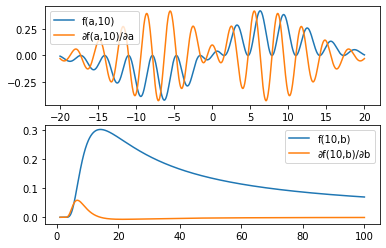

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [105]:


fig,(g1,g2) = plt.subplots(2)
f1 = plt.figure()
f2 = plt.figure()

a = np.linspace(-20, 20, 1000)
g1.plot(a, [function(a,10) for a in a], label="f(a,10)") 
g1.plot(a, [dfa(a,10) for a in a], label="∂f(a,10)/∂a")
g1.legend()


b = np.linspace(1, 100, 1000)
g2.plot(b, [function(10,b) for b in b], label="f(10,b)")
g2.plot(b, [dfb(10,b) for b in b], label="∂f(10,b)/∂b")
g2.legend()


4. Implement a function for approximate numerical differentiation, given the difference size $h$.

In [106]:
def function_accurcy_with_math(a,b):
   return (a/b)*np.cos(a)*np.cos(a)*np.exp(-(a*a)/(b*b))
   
def diff_a(a, b, h):   
    return (function_accurcy_with_math(a+h,b) - function_accurcy_with_math(a,b))/h

def diff_b(a, b, h):       
    return (function_accurcy_with_math(a,b+h) - function_accurcy_with_math(a,b))/h


5. Find the best difference size $h$ for differentiating
   * $f(3, 10)$ by $a$.
   * $f(1, 1)$ by $b$.

(Print the best step size, the derivative obtained and the difference between the numerical and the exact (algorithmic or symbolic) derivatives)

The best difference size minimizes the error of numerical differentiation relative to the exact differentiation.

Note: In this excercise it is recommended to use gradient descent, however a simple search is also accepted.


In [108]:
def best_diff_a():
  h    = 1.0
  err1 = abs(diff_a(3.0,10.0,h) - dfa(3.0,10.0))
  err2 = err1
  while err1>=err2 and h>0:
    h = h*0.9
    err1 = err2
    err2 = abs(diff_a(3.0,10.0,h) - dfa(3.0,10.0))
  return h/0.9

In [109]:
def best_diff_b():
  h = 1.0
  err1 = abs(diff_b(1.0,1.0,h) - dfb(1.0,1.0))
  err2 = err1
  while err1>=err2 and h>0:
    h = h*0.9
    err1 = err2
    err2 = abs(diff_b(1.0,1.0,h)- dfb(1.0,1.0))
  return h/0.9

In [110]:

stepA       = best_diff_a()
stepB       = best_diff_b()

derivativeA = diff_a(3.0,10.0,stepA)
derivativeB = diff_b(1.0,1.0,stepB)

difA        = abs(derivativeA - dfa(3.0,10.0))
difB        = abs(derivativeB - dfb(1.0,1.0))

print("The best step for f(3,10) by a is ", stepA, ", the derivative is ", derivativeA, ", and the difference is ",difA)
print("The best step for f(1,1) by b is ", stepB, ", the derivative is ", derivativeB, ", and the difference is ",difB)


The best step for f(3,10) by a is  0.0005075287860564164 , the derivative is  0.14997205 , and the difference is  8.779764e-05
The best step for f(1,1) by b is  0.0005639208733960182 , the derivative is  0.107255846 , and the difference is  0.00013794005


## Question 2: Optimization

### Logistic regression

Logistic regression is a statiscal model that models the probability of an event happening. In binary logistic regression there is a single binary dependent variable coded by '0' or '1'.

We can express the data as a tuple $(x,y)=(data,outcome)=(x,0/1)$

To model the probability of event $x$, we can use the logistic function $p(x)=\frac{1}{1+e^{-(x-\mu)/s}}$.

To find the appropiate $\mu$, that maximizes the classifaction accuracy we minimize the loss function $-\sum_{i=1}^N (y_i \log p(x_i) + (1 - y_i) \log (1 - p(x_i)))$.

In some cases, we give more importance to correctly classify one event over an other (like contracting an illness over not contracting it), and one way to express this is to add a "fixing parameter" in the loss function. One way this can be achieved is by adding weights: $-\sum_{i=1}^N (W_1y_i \log p(x_i) + W_2(1 - y_i) \log (1 - p(x_i)))$.


For a trial group of 20 rats, ratio of time exposed to a virus and the event of contracting that virus are given as a list of pairs (ratio, illness) (1 corresponds to having the illness):

In [111]:
rats = [(0.47, 0), (0.23, 0), (0.86, 1), (0.22, 0), (0.21, 1),
        (0.31, 0), (0.62, 0), (0.941, 1), (0.27, 0), (0.35, 1),
        (0.18, 0), (0.13, 0), (0.31, 1), (0.99, 1), (0.85, 1), 
        (0.35, 1), (0.6, 1), (0.89, 0), (0.6, 1), (0.92, 0)]

We want to predict rat illness based on the ratio of exposure to a virus. The prediction function is

$$illness = ratio \ge threshold.$$

The loss for this _classification_ problem is:

\begin{aligned}
& L = -\sum_{i=1}^N (W_1illness_i \log p_i + W_2(1 - illness_i) \log (1 - p_i)) \\
\mbox{where} & \\
& p_i = \frac 1 {1 + \exp(threshold - ratio_i)}
\\~\\
\mbox{and } &W_{1}, W_{2} \mbox{ are weights}
\end{aligned}

1. Implement the loss as a function of the threshold, and weights.

In [112]:
ratio  = [x[0] for x in rats]
illnes = [x[1] for x in rats]

In [113]:
def rats_classification_loss(threshold, data=rats):   
    sum = 0
    for i in range(len(data)):
      ratio_i   = (data[i])[0]
      illness_i = (data[i])[1]
      p_i       = 1/(1+np.exp(threshold- (ratio_i/100))) 
      sum       = sum + illness_i*np.log(p_i) + (1-illness_i)*np.log(1-p_i)
    return -1*sum 

2. Plot the loss and the derivative of the loss by the threshold in the range $threshold \in (0.01, 0.99)$, and $ W_1, W_2 = 1$.

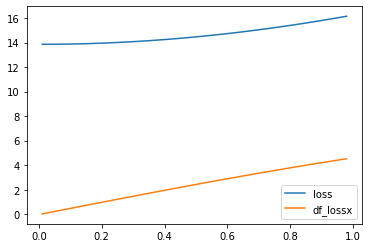

In [114]:
def rats_classification_loss_deriv(threshold):
    df = jax.grad(rats_classification_loss)
    return df(threshold)

df_loss = jax.grad(rats_classification_loss)   
x       = np.linspace(0.01,0.99,100,False)    
plt.plot(x, [rats_classification_loss(x) for x in x], label="loss")
plt.plot(x, [df_loss(x) for x in x], label="df_lossx")
plt.legend()


3. Find the best threshold using gradient descent, and $ W_1, W_2$ such that the number of true positives (rats which have the illness and were correctly classified) is greater than $80\%$, but the number of false positives ( rats which dont have the illness and were misclassified) is not $100\%$. (Note: you can fix $W_2$ to be 1)

In [116]:
def p(treshold, ratio):
  return (1/(1+np.exp(treshold-ratio)))

In [117]:
def gd(x0,w1,w2=1,step=0.1,decay=0.95,niter=30):
  df  = jax.grad(loss)
  x   = x0
  
  for i in range(niter):
    x    -= df(x,w1,w2)*step
    step *= decay
  return x

def loss(treshold, w1, w2):
  L = 0
  for i in range(20):
    L += w1*illnes[i]*np.log(p(treshold, ratio[i])) + w2*(1-illnes[i])*np.log(1-p(treshold, ratio[i]))
  return -L

In [118]:
def find_tresh_n_w1():

  positive = 10
  w1       = np.linspace(1,2,20)

  for w in w1:
    true_positive  = 0
    false_positive = 0
    treshold       = gd(0.1*(random.random()-0.5), w)

    for i in range(20):
      if (ratio[i]>treshold):

        if (illnes[i] == 0):
          false_positive += 1
        else:
          true_positive += 1
    
    if true_positive/positive >= 0.8 and false_positive != 10:
      return (treshold, w)
  
  return null

(treshold, w1) = find_tresh_n_w1()
print("The best treshold is", treshold, ", with w1=", w1, " and w2=1")


The best treshold is 0.3280216 , with w1= 1.2105262  and w2=1


4. Find the best threshold using Newton's method, given $W_1, W_2$ from previous question. (Newton's method was explained in class). How many iterations were needed?

In [119]:
W1   = 1.2105262
W2   = 1


In [120]:
def newton(tres,w1=W1,w2=W2, niter=10):
  df   = jax.grad(loss)
  ddf  = jax.grad(df)
  x    = tres
  iter = 0
  for i in range(niter):
    x = x - df(x,w1,w2)/ddf(x,w1,w2)
    
  return x

treshold = newton(0.1*(random.random()-0.5))
print(treshold)
print("The number of iterations is: 10")

0.32803202
The number of iterations is: 10


5. Show actual vs. predicted recoveries as a scatter plot for the best threshold. How many recoveries were misclassified?

6 rats were misclassified - 4 false positive, and 2 false negative


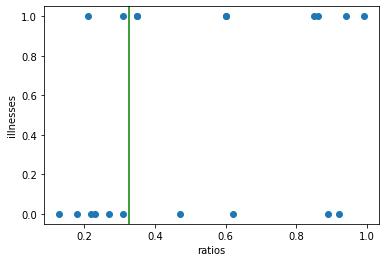

In [63]:

plt.scatter([rat[0] for rat in rats], [rat[1] for rat in rats])
plt.axvline(x=treshold, color="green")
plt.xlabel("ratios")
plt.ylabel("illnesses")
print("6 rats were misclassified - 4 false positive, and 2 false negative")
